# REGRESIÓN LOGÍSTICA PARA CLASIFICACIÓN

##  Edison David González Blandón - JuanEsteban Velásquez

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df1 = pd.io.excel.read_excel("DatosPunto2.xlsx", sheetname=0)#cargo el archivo
letters = df1.iloc[:,0].copy()#cargo las letras en una lista llamada letters
val = df1.iloc[:,1:16].copy()#cargo los valores en una lista llamada val
#normalización min-max
apellidos = 'VELASQUZGON'# Velasquez y gonzalez
val = (val-np.min(val, axis = 0))/(np.max(val, axis = 0)-np.min(val, axis = 0))
X = np.array(val)
y = np.zeros((X.shape[0],))
i = 0
for L in letters:
    if apellidos.find(L) >= 0:
        y[i] = 1  
    i += 1
X_original = X
Y_original = y
Numero_Filas_Datos = X.shape[0] #Obteniendo la cantidad de elementos en una lista, es decir la cantidad de filas

N_datos_entrenamiento = int(Numero_Filas_Datos*0.7) #70% para entrenamiento 
N_datos_validacion = int(Numero_Filas_Datos*0.15) #15% para validación
N_datos_prueba = Numero_Filas_Datos - N_datos_validacion - N_datos_entrenamiento #15% para prueba
matrix_normalizado = X #Ya quedo un vector de 768 filas y 8 columnas
matrix_salida = y #Quedo como un vector fila
matrix_entrenamiento = matrix_normalizado[0:N_datos_entrenamiento,:] #Matriz[537,8]
matrix_salida_entrenamiento = matrix_salida[0:N_datos_entrenamiento] #Matriz[537,1]
matrix_validacion = matrix_normalizado[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion),:] #Matriz[115,8]
matrix_salida_validacion = matrix_salida[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion)] #Matriz[115,1]
matrix_prueba = matrix_normalizado[N_datos_validacion:(N_datos_validacion+N_datos_prueba),:] #Matriz[116,8]
matrix_salida_prueba = matrix_salida[N_datos_validacion:(N_datos_validacion+N_datos_prueba)] #Matriz[1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [17]:

def sigmoid(x,deriv=False):
    return 1/(1+np.exp(-x))
def LogisticRegression(X,y,alpha=0.0017,lamda=0.1,iteraciones=1000):   
    if X.ndim > 1:
        [M,N] = X.shape
    else:
        M = X.shape[0]
        N = 1
        X = X[:,None]
    VectorBias = np.ones(shape=(M,1))
    X = np.concatenate((VectorBias,X),axis=1)
    theta = np.random.rand(N+1,1)
    arr = np.arange(M)
    np.random.shuffle(arr)
    X=X[arr,:]
    y=y[arr]
    for j in range(0,iteraciones):
        h_x = sigmoid(np.dot(X,theta))
        #print("hx")
        J0 = (1-y)*np.log(1-h_x)
        #print("j0")
        J1 = y*np.log(h_x)
        #print("j1")
        J0[np.isinf(J0)]=0
        #print("miro si es infinito j0")
        J1[np.isinf(J1)]=0
        #print("miro si es infinito j1")
        J0 = -1/M * np.sum(J0)
        #print("Opero j0")
        J1 = -1/M * np.sum(J1)      
        #print("Opero j1")
        J = J1+J0
        #print("Opero J suma")
        dJ_dtheta = 1/(M)*np.dot((h_x-y).T,X).T
        #print("Dj tehta")
        theta = theta - alpha* dJ_dtheta
        #print("theta")
        theta[1:] = theta[1:] - alpha*lamda/M*theta[1:] #Regularization
        #print("iteré: " + str(j))
    return theta
def prediction(X,theta):
    X = np.insert(X,0,1)
    return sigmoid(np.dot(X,theta))
print("inicio entrenamiento")
theta=LogisticRegression(matrix_entrenamiento, matrix_salida_entrenamiento[:,None])
print("final entrenamiento")

inicio entrenamiento
final entrenamiento


51.28376125375125


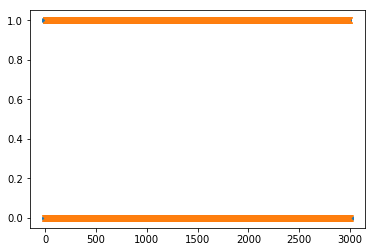

In [18]:
prediccion = []
for i in range(0,matrix_validacion.shape[0]):
    prediccion.append(prediction(matrix_validacion[i,:],theta))
#d = {'1. valor predicho':prediccion,'2. etiqueta':matrix_salida_entrenamiento}
prediccion=np.array(prediccion)  
error=0
for i in range (0,matrix_salida_validacion.shape[0]):
    if(prediccion[i]>0.7):
        prediccion[i]=1
    else:
        prediccion[i]=0
for i in range(0,matrix_salida_validacion.shape[0]):
    if(prediccion[i]==matrix_salida_validacion[i]):
        error=error+1;
error=error/len(prediccion)*100        
#df = pd.DataFrame(data=d)
#df
print(error)
plt.plot(prediccion,'o')
plt.plot(matrix_salida_validacion,'x')
plt.show()

53.64878373875375


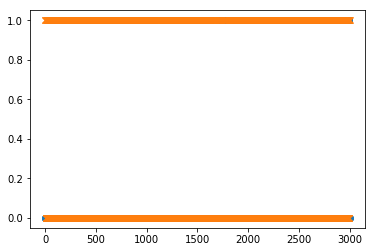

In [19]:
prediccion_prueba = []
for i in range(0,matrix_prueba.shape[0]):
    prediccion_prueba.append(prediction(matrix_prueba[i,:],theta))
#d = {'1. valor predicho':prediccion,'2. etiqueta':matrix_salida_entrenamiento}
prediccion_prueba=np.array(prediccion_prueba)  
error=0
for i in range (0,matrix_salida_prueba.shape[0]):
    if(prediccion_prueba[i]>0.7):
        prediccion_prueba[i]=1
    else:
        prediccion_prueba[i]=0
for i in range(0,matrix_salida_prueba.shape[0]):
    if(prediccion_prueba[i]==matrix_salida_prueba[i]):
        error=error+1;
error=error/len(prediccion_prueba)*100        
#df = pd.DataFrame(data=d)
#df
print(error)
plt.plot(prediccion_prueba,'o')
plt.plot(matrix_salida_prueba,'x')
plt.show()